# <font color='blue'>Unidad II: Aprendizaje supervisado </font>
# <font color='blue'>2. Clasificación </font>

La tarea de la clasificación es la siguiente: aprender cómo se clasifica un conjunto determinado de puntos de datos y sus etiquetas correspondientes para que, cuando llegue un nuevo punto de datos, podamos colocarlo en la clase correcta. Normalmente, tomaríamos datos existentes con etiquetas para construir un modelo, lo que se denomina “entrenamiento”, como analizamos en el capítulo anterior. Con este modelo podemos realizar una clasificación de datos nuevos, lo que se denomina "pruebas".

# <font color='blue'>2.1. $k$-NN </font>

Para comprender mejor el problema de clasificación, vamos a revizar el algoritmo, $k$-NN ($K$ vecinos más próximos), que hace que la parte de entrenamiento sea muy sencilla, lo que nos permite pasar a las pruebas casi de inmediato. Veamos cómo funciona $k$-NN enumerando los pasos principales del algoritmo:
1. Como en el problema general de clasificación, tenemos un conjunto de puntos de datos para los cuales conocemos las etiquetas de clase correctas.
2. Cuando obtenemos un nuevo punto de datos, lo comparamos con cada uno de nuestros puntos de datos existentes y encontramos similitudes.
3. Tome los $k$ puntos de datos más similares ($k$ vecinos más cercanos).
4. De estos $k$ puntos de datos, tome el voto mayoritario de sus etiquetas. La etiqueta ganadora es la etiqueta/clase del nuevo punto de datos.

$k$ suele ser un número pequeño entre 2 y 20. Como puedes imaginar, cuanto mayor sea el número de vecinos más cercanos (el valor de $k$), más tiempo nos llevará realizar el procesamiento. Veamos esto con un ejemplo.


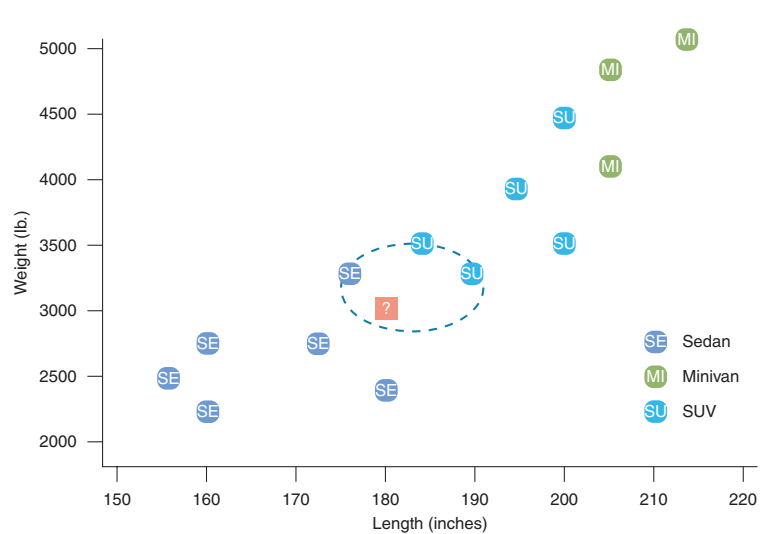

En la figura hemos trazado nuestros datos existentes sobre tres tipos de automóviles en dos dimensiones: longitud y peso. Estos tres tipos son sedán, SUV (vehículo utilitario deportivo) y minivan. Por supuesto, hay muchas otras características o dimensiones para estos vehículos, pero por simplicidad y posibilidad de visualización nos limitaremos a dos aquí. Lo que ves en esta figura ya es un modelo entrenado. No hay nada específico que hacer aquí para el entrenamiento ya que los datos ya están organizados según las dimensiones consideradas con sus etiquetas correspondientes. Por tanto, podemos pasar a la fase de prueba. Imaginemos que tenemos un vehículo nuevo que queremos clasificar en función de su longitud y peso. Lo colocamos en el mismo plano (se muestra con un “?” en la Figura). Ahora, miramos a sus vecinos. Aplicando $k$-NN con $k$ = 3, vemos que los tres vecinos más cercanos son un sedán y dos SUV. Por mayoría de votos podemos declarar que el nuevo vehículo puede clasificarse como SUV. Para la clasificación normalmente no hay nada más fácil que esto. ¿Pero ve usted las deficiencias de este enfoque?

Primero, nuestro enfoque es muy sensible a las características en bruto que podemos capturar y considerar. La técnica en sí no nos dice qué características considerar o sopesar.

En segundo lugar, asumimos que las clases se pueden distinguir utilizando las características que estamos considerando. Si los miembros de diferentes clases están demasiado cerca unos de otros, es posible que tengamos dificultades para identificar los puntos de prueba que se superponen.

La decisión puede ser demasiado sensible al número de vecinos que miramos. Y existe la tercera deficiencia: el hecho de que el valor de $k$ sea pequeño puede significar un posible sesgo ya que tomamos entradas de muy pocos vecinos, pero un valor de $k$ grande podría significar más potencia de procesamiento (recuerde, debemos buscar esos vecinos más cercanos). A pesar de estas deficiencias, $k$-NN es, con diferencia, una de las técnicas de clasificación más fáciles de comprender e implementar. Si tiene datos lo suficientemente claros (una pequeña cantidad de características que ayudan a distinguir las clases, como vemos en la Figura), $k$-NN puede brindarle uno de los mejores resultados al menor costo. No es mala idea comenzar con $k$-NN como primera técnica para intentar la clasificación. Así que sigamos adelante y hagamos precisamente eso.

Usaremos un conjunto de datos de vino. Estos datos contienen información sobre varios atributos de diferentes vinos y sus cualidades correspondientes. En concreto, el vino se clasifica como de alta calidad o no. Consideraremos estos atributos (alta calidad, baja calidad) como etiquetas de clase y construiremos un clasificador que aprenda (basado en otros atributos) cómo se clasifica un vino en una de estas dos clases. Empezamos importando las diferentes bibliotecas que necesitamos. Después de eso, cargamos los datos, entrenamos un clasificador con el 70% de los datos totales, probamos ese clasificador con el 30% restante de los datos y calculamos la precisión del clasificador.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Wine.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
X = df[['density','sulphates','residual sugar']]
y = df['quality']

In [ ]:
# Mark about 70% of the data for training and use the rest for
# testing
# We will use 'density', 'sulphates', and 'residual_sugar'
# features for training a classifier on 'high_quality'
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
#X_train, X_test, y_train, y_test = train_test_split(df[['density','chlorides']], df['quality'], test_size=.3)
X_train, X_test, y_train, y_test = train_test_split(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'], test_size=.3)

/tmp/ipython-input-794486885.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_quality))


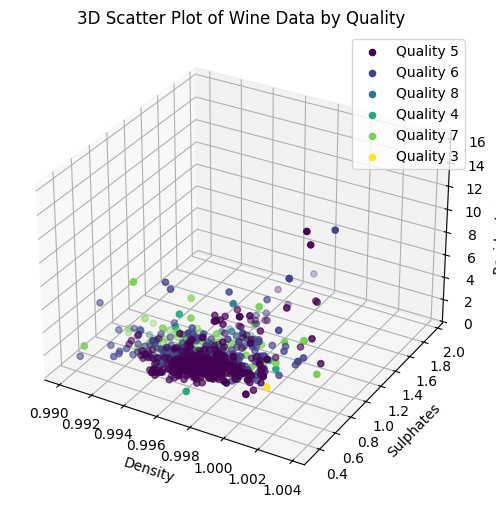

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Get unique quality values and assign a color map
unique_quality = y_train.unique()
colors = plt.cm.get_cmap('viridis', len(unique_quality))

# Plot each data point with its corresponding color based on quality
for i, quality in enumerate(unique_quality):
    ax.scatter(X_train[y_train == quality]['density'],
               X_train[y_train == quality]['sulphates'],
               X_train[y_train == quality]['residual sugar'],
               c=[colors(i)], label=f'Quality {quality}')

ax.set_xlabel('Density')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Residual Sugar')
ax.set_title('3D Scatter Plot of Wine Data by Quality')
ax.legend()
plt.show()

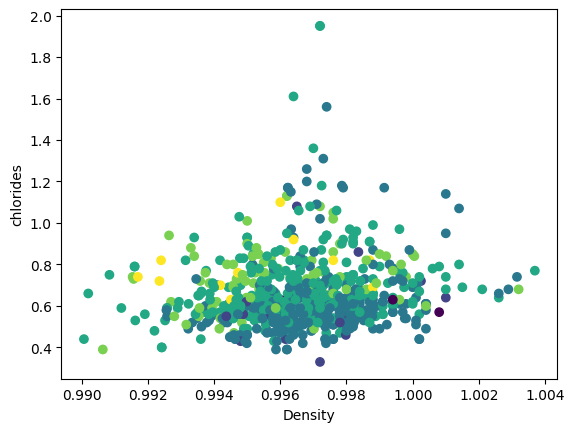

In [ ]:
plt.scatter(X_train.density, X_train.sulphates, c=y_train)
plt.xlabel("Density")
plt.ylabel("chlorides")
plt.show()

In [ ]:
# Define the classifier using kNN function and train it
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
# Test the classifier by giving it test instances
prediction = classifier.predict(X_test)

In [ ]:
# Count how many were correctly classified
correct = np.where(prediction==y_test, 1, 0).sum()
print (correct)

160


In [ ]:
# Calculate the accuracy of this classifier
accuracy = correct/len(y_test)
print (accuracy)

0.46647230320699706


k= 1  Accuracy= 0.5131195335276968
k= 3  Accuracy= 0.46647230320699706
k= 5  Accuracy= 0.4897959183673469
k= 7  Accuracy= 0.5131195335276968
k= 9  Accuracy= 0.5335276967930029
k= 11  Accuracy= 0.5335276967930029
k= 13  Accuracy= 0.565597667638484
k= 15  Accuracy= 0.5481049562682215
k= 17  Accuracy= 0.5335276967930029
k= 19  Accuracy= 0.521865889212828
k= 21  Accuracy= 0.5306122448979592
k= 23  Accuracy= 0.5306122448979592
k= 25  Accuracy= 0.5131195335276968
k= 27  Accuracy= 0.5131195335276968
k= 29  Accuracy= 0.5393586005830904
k= 31  Accuracy= 0.5364431486880467
k= 33  Accuracy= 0.5364431486880467
k= 35  Accuracy= 0.5189504373177842
k= 37  Accuracy= 0.5247813411078717
k= 39  Accuracy= 0.5247813411078717
k= 41  Accuracy= 0.5276967930029155
k= 43  Accuracy= 0.5335276967930029
k= 45  Accuracy= 0.521865889212828
k= 47  Accuracy= 0.5189504373177842
k= 49  Accuracy= 0.5102040816326531
k= 51  Accuracy= 0.4897959183673469
k= 53  Accuracy= 0.5014577259475219
k= 55  Accuracy= 0.4927113702623906

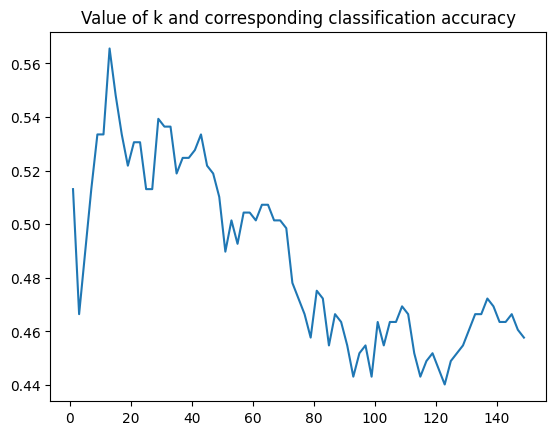

In [ ]:
#Start with an array where the results (k and corresponding
# accuracy) will be stored
results = []

for k in range(1, 151, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction==y_test, 1, 0).sum() / (len(y_test))
    print ("k=",k," Accuracy=", accuracy)
    results.append([k, accuracy]) # Storing the k,accuracy tuple in results array

# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()

# <font color='blue'>2.1. Árboles de decisión </font>

Un árbol de decisión construye modelos de clasificación o regresión en forma de estructura de árbol. Divide un conjunto de datos en subconjuntos cada vez más pequeños y, al mismo tiempo, desarrolla incrementalmente un árbol de decisión asociado. El resultado final es un árbol con nodos de decisión y nodos de hoja. Pero este no es un árbol “normal” que crece con raíces en la parte inferior y ramas y hojas en la parte superior. Este es un árbol invertido que comienza con una raíz en la parte superior y crece hacia abajo con ramas que se separan. Cada división es un punto de decisión. Cada nodo u hoja proporciona una decisión (etiqueta de clase). En resumen, un árbol de decisión es un árbol jerárquico de arriba hacia abajo construido desde un nodo raíz hasta las hojas e implica dividir los datos en subconjuntos más pequeños que contienen instancias con valores similares (homogéneos). La idea aquí es construir/aprender este árbol a partir de los datos de entrenamiento, de modo que cuando obtengamos datos de prueba, para cada punto de datos dado podamos movernos a través de ese árbol de decisión y verificar las condiciones en cada rama, terminando en un nodo que nos proporciona la etiqueta de clase. Considere el conjunto de datos presentado en la Tabla siguiente. El conjunto de datos tiene cuatro atributos: color, tamaño, acto y edad. También tiene una etiqueta de clase: inflado (Verdadero o Falso). Usaremos este conjunto de datos para comprender cómo funciona un algoritmo de árbol de decisión. Existen varios algoritmos que generan árboles de decisión, como ID3/4/5, CART y CLS. De ellos, el más popular es ID3. ID3 emplea entropía y ganancia de información para construir un árbol de decisión. Antes de repasar el algoritmo, comprendamos estos dos términos.

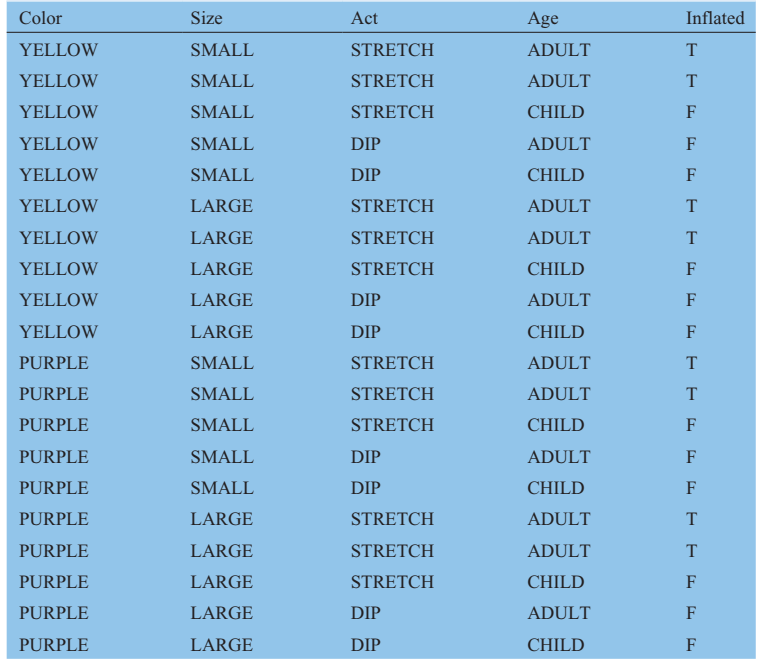

**La entropía** es una medida de desorden, incertidumbre o aleatoriedad. Si lanzo una moneda equilibrada, hay las mismas posibilidades de obtener cara o cruz. En otras palabras, estaríamos muy inseguros sobre el resultado, por lo que tendríamos una entropía alta. La fórmula de la entropía es:

$$E = -\sum_{i=1}^{k}p_i \mbox{log}_2(p_i)$$

Aquí, $k$ es el número de valores de clase posibles y $p_i$ es el número de apariciones de la clase $i = 1$ en el conjunto de datos. En el conjunto de datos "globos", el número de valores de clase posibles es 2 (Verdadero o Falso). La razón de los signos menos es que los logaritmos de las fracciones $p_1, p_2,…, p_n$ son negativos, por lo que la entropía en realidad es positiva. Generalmente los logaritmos se expresan en base 2, y luego la entropía se expresa en unidades llamadas bits.

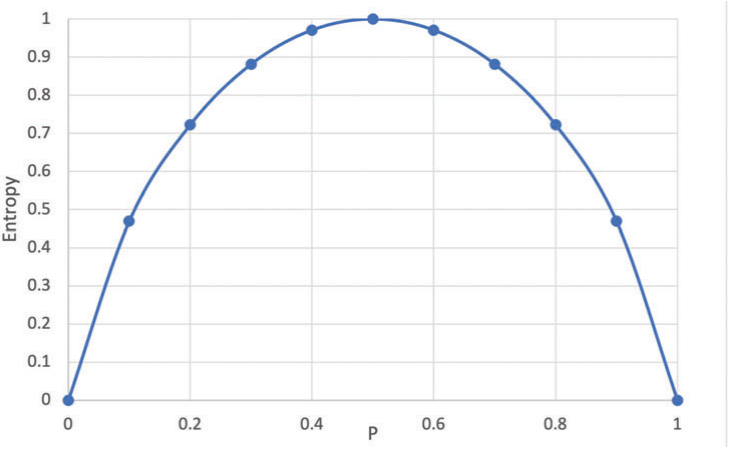

La figura muestra la curva de entropía con respecto a los valores de probabilidad de un evento. Como puede ver, está en su punto más alto (1) cuando la probabilidad de un evento de dos resultados es 0,5. Si tenemos una moneda equilibrada, la probabilidad de obtener cara o cruz es 0,5. La entropía de esta moneda es la más alta, lo que refleja la mayor cantidad de incertidumbre que tendremos con el resultado de esta moneda. Si, por el contrario, nuestra moneda es completamente injusta y cada vez sale “cara”, la probabilidad de obtener cara con esta moneda será 1 y la entropía correspondiente será 0, lo que indica que no hay incertidumbre sobre el resultado de este evento.

**Ganancia de información:** Si pensabas que hoy no iba a llover y te digo que efectivamente lloverá, has ganado algo de información. Por otro lado, si ya sabías que iba a llover, entonces mi predicción no afectará mucho a tus conocimientos actuales. Existe una forma matemática de medir dicha ganancia de información:

$$IG(A,B) = \mbox{Entropia}(A)-\mbox{Entropia}(A|B)$$

La ganancia de información lograda al conocer $B$ junto con $A$ es la diferencia entre la entropía (incertidumbre) de $A$ y la entropía de $A$ condicional a $B$. Tenga esto en cuenta y lo revisaremos a medida que trabajamos en el siguiente ejemplo.

Pero primero, volvamos al algoritmo del árbol de decisión. El algoritmo ID3 utiliza entropía para calcular la homogeneidad de una muestra. Si la muestra es completamente homogénea, la entropía es 0; si la muestra se divide equitativamente entre dos valores, la entropía es 1. Para construir el árbol de decisión necesitamos calcular dos tipos de entropía usando tablas de frecuencia, de la siguiente manera:

1. Entropía usando la tabla de frecuencia de un atributo:

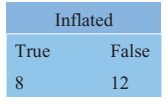

Hallamos la entropia con:
$$E(Inflated) = -\sum_{i=1}^{k}p_i \mbox{log}_2(p_i)$$

$$p_T = \frac{8}{20}=0.4$$

$$p_F = \frac{12}{20}=0.6$$

$$E(Inflated)= E(12,8)$$

$$E(Inflated)= E(0.6,0.4)$$

$$E(Inflated) = -\left[p_T \mbox{log}_2(p_T)+p_F \mbox{log}_2(p_F)\right]$$

$$E(Inflated)= -\left[0.4\mbox{log}_2(0.4)+0.6\mbox{log}_2(0.6)\right]$$

$$E(Inflated)= -\left[-0.5288-0.4422\right]$$

$$E(Inflated)= 0.9710$$



2. De manera similar, la entropía usando la tabla de frecuencia de dos atributos es:

$$E(A,B) = \sum_{k\in B}p(k)E(k)$$

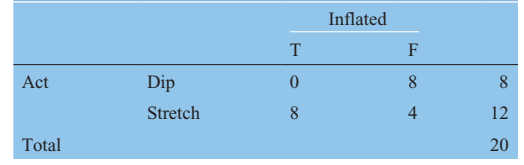

Por tanto:

$$E(Inflated| Act)= P(Dip)xE(8,0)+P(Stretch)xE(4,8)$$
$$E(Inflated| Act)= (\frac{8}{20})x0.0+(\frac{12}{20})x(-(0.3\mbox{log}_2(0.3))-(0.7\mbox{log}_2(0.7))$$

$$E(Inflated| Act)= (\frac{12}{20})x(0.5278+0.3813)$$
$$E(Inflated| Act)= 0.4256$$

Si la entropía es desorden, entonces la ganancia de información es una medida de la reducción de ese desorden lograda al dividir el conjunto de datos original. Construir un árbol de decisión consiste en encontrar un atributo que devuelva la mayor ganancia de información (es decir, las ramas más homogéneas). Los siguientes son los pasos para crear un árbol de decisión basado en la entropía y la ganancia de información:

**Paso 1:** Calcule la entropía de la variable objetivo o de clase, que es 0,9710 en nuestro caso.

**Paso 2:** Luego, el conjunto de datos se divide en los diferentes atributos en subtablas más pequeñas, como Inflado y Act, Inflado y Edad, Inflado y Tamaño, e Inflado y Color. Se calcula la entropía de cada subtabla. Luego, se suma proporcionalmente para obtener la entropía total para la división. La entropía resultante se resta de la entropía antes de la división. El resultado es la ganancia de información o la disminución de la entropía.

**Paso 3:** elija el atributo con la mayor ganancia de información como nodo de decisión, divida el conjunto de datos por sus ramas y repita el mismo proceso en cada rama. Si sigue estas pautas paso a paso, debería terminar con el árbol de decisiones que se muestra en la Figura.

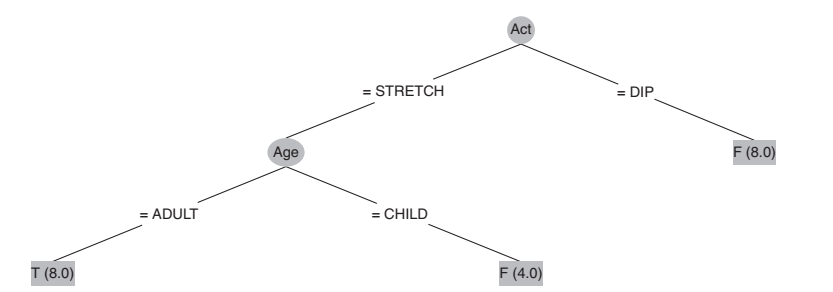

**Regla de decisión**

Las reglas son una alternativa popular a los árboles de decisión. Las reglas suelen tomar la forma de una expresión {SI: ENTONCES} (por ejemplo, {SI “condición” ENTONCES “resultado”}. Normalmente, para cualquier conjunto de datos, una regla individual en sí misma no es un modelo, ya que esta regla solo se puede aplicar cuando se cumple la condición asociada. Por lo tanto, los métodos de aprendizaje automático basados en reglas generalmente identifican un conjunto de reglas que en conjunto comprenden el modelo de predicción o la base de conocimientos. Para adaptarse a cualquier conjunto de datos, se puede derivar fácilmente un conjunto de reglas a partir de un árbol de decisiones. caminos desde el nodo raíz hasta los nodos hoja, uno a la vez. Para el árbol de decisión anterior, las reglas de decisión correspondientes se muestran en el lado izquierdo de la Figura siguiente. Lo que significa es que para cada una de las reglas de decisión estamos viendo una línea o un plano perpendicular al eje de la dimensión correspondiente. Este hiperplano (una palabra elegante para una línea o un plano en una dimensión superior) separa los puntos de datos alrededor de esa dimensión. Puedes considerarlo como un límite de decisión. Todo lo que esté en un lado pertenece a una clase, y los puntos de datos del otro lado pertenecen a otra clase.

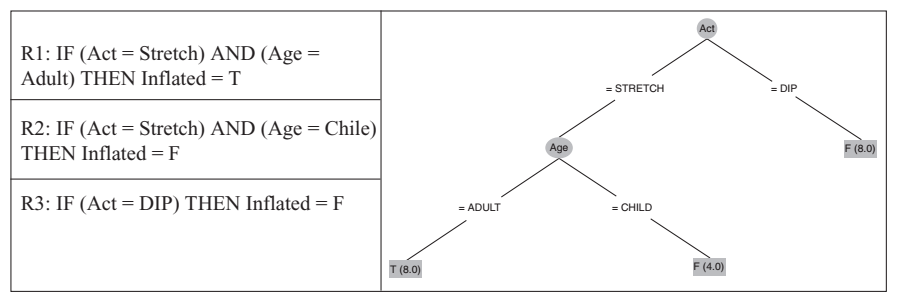

**Regla de clasificación**

Es fácil leer un conjunto de reglas de clasificación directamente de un árbol de decisión. Se genera una regla para cada hoja. El antecedente de la regla incluye una condición para cada nodo en el camino desde la raíz hasta esa hoja, y el consecuente de la regla es la clase asignada por la hoja. Este procedimiento produce reglas que son inequívocas en el sentido de que el orden en que se ejecutan es irrelevante. Sin embargo, en general, las reglas que se leen directamente de un árbol de decisión son mucho más complejas de lo necesario y las reglas derivadas de árboles generalmente se eliminan para eliminar pruebas redundantes. Como los árboles de decisión no pueden expresar fácilmente la disyunción implícita entre las diferentes reglas de un conjunto, transformar un conjunto general de reglas en un árbol no es tan sencillo. Un buen ejemplo de esto ocurre cuando las reglas tienen la misma estructura pero diferentes atributos, como por ejemplo:

Si a y b, entonces x.

Si c y d, entonces x.

Entonces, es necesario romper la simetría y elegir una única prueba para el nodo raíz. Si, por ejemplo, se elige a, la segunda regla debe, en efecto, repetirse dos veces en el árbol. Esto se conoce como problema del subárbol replicado.

**Regla de asociación**

Las reglas de asociación no son diferentes de las reglas de clasificación, excepto que pueden predecir cualquier atributo, no sólo la clase, y esto les da la libertad de predecir también combinaciones de atributos. Además, las reglas de asociación no están destinadas a usarse juntas como un conjunto, como sí lo hacen las reglas de clasificación. Diferentes reglas de asociación expresan diferentes regularidades que subyacen al conjunto de datos y, por lo general, predicen cosas diferentes. Debido a que se pueden derivar tantas reglas de asociación diferentes incluso a partir de un conjunto de datos muy pequeño, el interés se limita a aquellas que se aplican a un número razonablemente grande de instancias y tienen una precisión razonablemente alta en las instancias a las que se aplican. La cobertura o soporte de una regla de asociación es el número de casos en los que predice correctamente. Su precisión (a menudo llamada confianza) es el número de casos en los que predice correctamente, expresado como una proporción de todos los casos a los que se aplica. Por ejemplo, considere los datos meteorológicos para jugar al golf en la Tabla siguiente, un conjunto de datos de entrenamiento sobre el clima y la correspondiente variable objetivo "Jugar" (que codifica si es posible o no jugar golf con el clima de ese día). El árbol de decisión y las reglas de decisión derivadas para este conjunto de datos se muestran en la Figura 5.6. Consideremos esta regla: si temperatura = frío, entonces humedad = normal. La cobertura es el número de días que son frescos y tienen humedad normal (cuatro en los datos de la Tabla), y la precisión es la proporción de días fríos que tienen humedad normal (100% en este caso). Algunas otras reglas de asociación de buena calidad para la Figura siguiente son:

• Si humedad = normal y viento = falso, entonces juega = sí.

• Si perspectiva = soleado y juego = no, entonces ventoso = verdadero.

• Si hay viento = falso y juego = no, entonces perspectiva = soleado y humedad = alta.

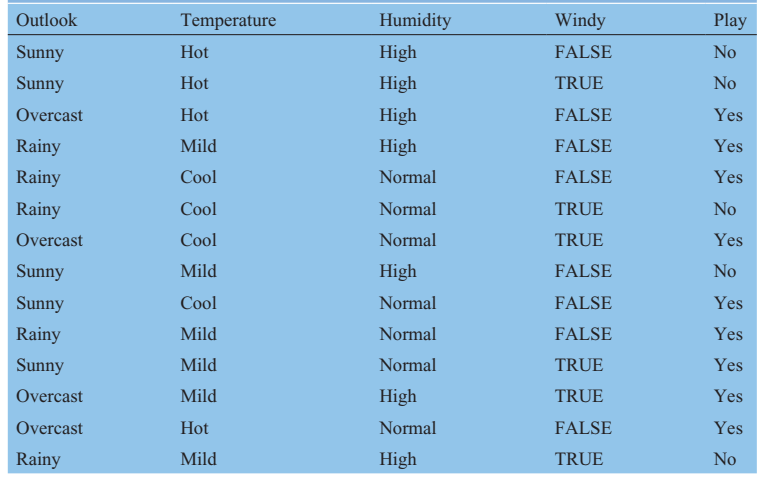

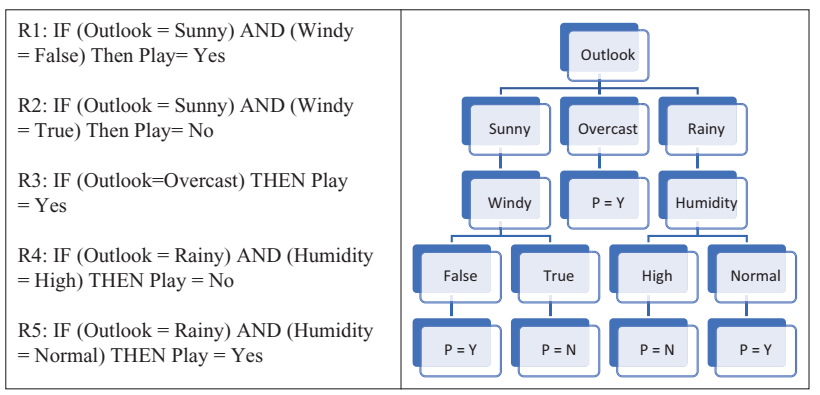

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
bal_df = pd.read_csv('balloons.csv')

In [3]:
bal_df.head()

,Color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F


In [4]:
# convert categorical data to int representations of unique categories
for col in bal_df.columns:
    labels, uniques = pd.factorize(bal_df[col])
    bal_df[col] = labels

bal_df

,Color,size,act,age,inflated
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
71,1,0,1,1,1
72,1,1,0,0,0
73,1,1,0,1,1
74,1,1,1,0,1


In [5]:
X = bal_df.drop(columns='inflated')
y = bal_df['inflated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [6]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8695652173913043
[[10  2]
 [ 1 10]]


In [10]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=('Color', 'size', 'act', 'age'),
                                class_names=('0','1'),
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('balloons_dt', view=True)

'balloons_dt.png'

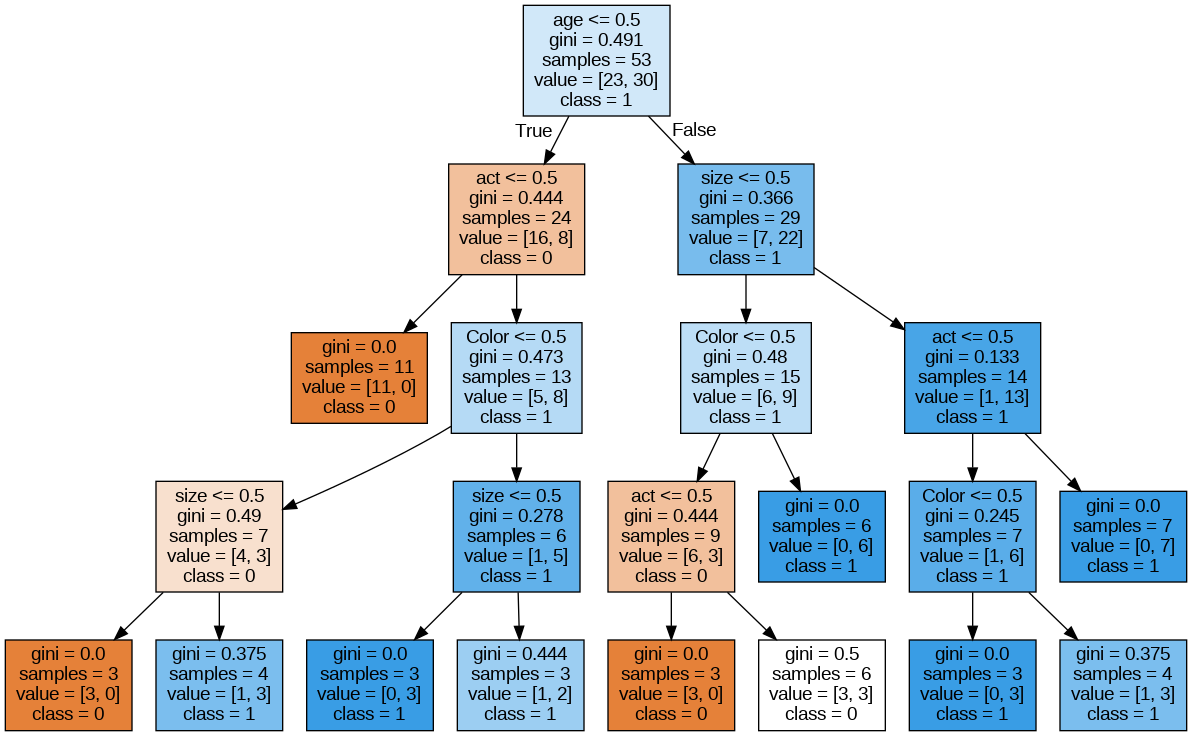

# <font color='blue'>2.2. Bosques aleatorios </font>

Un árbol de decisiones parece un buen método para realizar clasificaciones: normalmente tiene buena precisión y, lo que es más importante, proporciona información comprensible para los humanos. Pero un gran problema que tiene el algoritmo del árbol de decisión es que podría sobreajustar los datos.

Una forma de abordar este problema es utilizar no sólo uno, ni sólo dos, sino muchos árboles de decisión, cada uno de ellos creado de forma ligeramente diferente, y luego tomar algún tipo de promedio de lo que estos árboles deciden y predicen. Este enfoque es útil y deseable en muchas situaciones, y existe todo un conjunto de algoritmos que lo aplican. Se llaman métodos de conjunto.

En ML, los métodos de conjunto se basan en múltiples algoritmos de aprendizaje para obtener una mayor precisión de predicción que la que puede lograr cualquiera de los algoritmos de aprendizaje constituyentes. En general, un algoritmo de conjunto consta de un conjunto concreto y finito de modelos alternativos, pero incorpora una estructura mucho más flexible entre esas alternativas. Un ejemplo de método de conjunto es el bosque aleatorio, que se puede utilizar tanto para tareas de regresión como de clasificación.



El bosque aleatorio opera construyendo una multitud de árboles de decisión en el momento del entrenamiento y seleccionando el modo de la clase como etiqueta de clase final para la clasificación o predicción media de los árboles individuales cuando se usa para tareas de regresión.

La ventaja de utilizar bosques aleatorios sobre árboles de decisión es que el primero intenta corregir el hábito de los árboles de decisión de sobreajustar los datos al conjunto de entrenamiento.

Así es como funciona. Para un conjunto de muestras de  entrenamiento de tamaño $L$, cada árbol de decisión se crea de la siguiente manera:

1. Se toma una muestra de los $L$ casos de entrenamiento al azar pero con reemplazo del conjunto de entrenamiento original. En este caso, “con reemplazo” significa que se podría volver a extraer la misma muestra. Esta muestra se utilizará como conjunto de entrenamiento para hacer crecer el árbol.

2. Si el conjunto de datos tiene $N$ variables de entrada, se especifica un número $n$ (siendo $n$ mucho más pequeño que $N$) de modo que en cada nodo, se seleccionen $n$ variables al azar entre $N$. Entre estas $n$, se utiliza la mejor división para dividir el nodo. El valor de $n$ se mantiene constante mientras cultivamos el bosque.

3. Siguiendo los pasos anteriores, cada árbol crece en su mayor extensión posible y no se realiza ninguna poda.

4. Predecimos nuevos datos agregando las predicciones de los $l$ árboles (es decir, la mayoría vota por la clasificación, el promedio por la regresión).

Digamos que un conjunto de datos de entrenamiento, $L$, tiene cuatro observaciones en tres variables predictoras, $A$, $B$ y $C$. Los datos de entrenamiento se proporcionan en la Tabla siguiente. Ahora trabajaremos con el algoritmo de bosque aleatorio en este pequeño conjunto de datos.



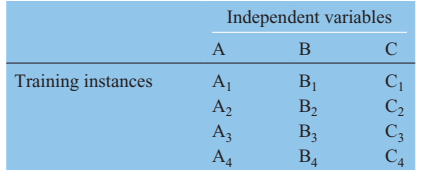

**Paso 1:** muestrear los $L$ casos de entrenamiento al azar (aquí, $L = 4$). Estos subconjuntos de $L$, $l1$, $l2$, $l3$,… ,$L$ (como se muestra en la Tabla siguiente) se utilizan para hacer crecer (entrenar) los $l$ árboles de decisión. Estas muestras se extraen del modo más aleatorio posible, con o sin superposición entre ellas. Por ejemplo, $l1$ puede constar de las instancias de entrenamiento 1, 1, 2 y 4. De manera similar, $l2$ puede constar de 2, 3, 3 y 4, y así sucesivamente.

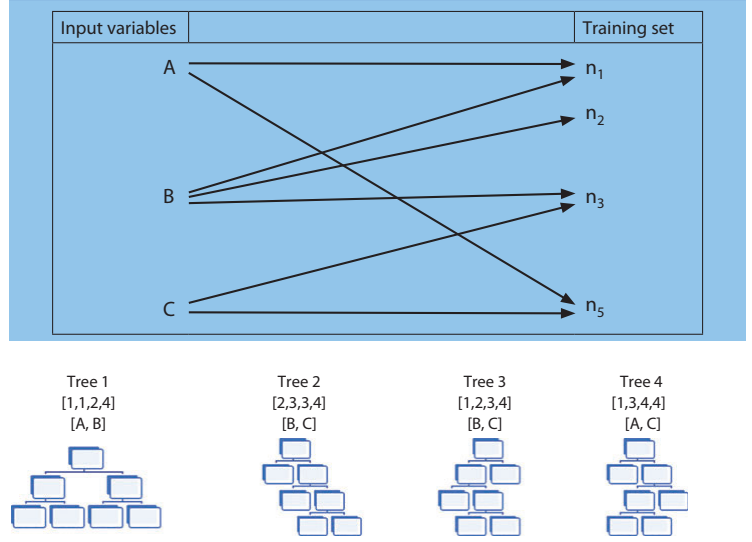



**Paso 2:** De las tres variables predictoras, se especifica un número $n < 3$ de modo que en cada nodo se seleccionen al azar $n$ variables de $N$. Digamos que $n$ es 2; $n_1$ se puede entrenar en $A$, $B$. $n_2$ se puede entrenar en $B$, $C$, etc. Los árboles de decisión resultantes pueden parecerse a lo que se muestra en la Figura anterior.

El bosque aleatorio utiliza una técnica de muestreo de arranque, que implica el muestreo de los datos de entrenamiento con reemplazo. Antes de utilizar el algoritmo, una parte de los datos (normalmente un tercio) que no se utiliza para el entrenamiento se reserva para pruebas.

Esto sucede con cada árbol de decisión individual, no con el algoritmo de bosque aleatorio en su conjunto. A veces se las conoce como muestras listas para usar. Una estimación del error en esta muestra, conocida como error fuera de la bolsa, proporciona evidencia de que la estimación fuera de la bolsa puede ser tan precisa como tener un conjunto de prueba del mismo tamaño que el conjunto de entrenamiento. Por lo tanto, el uso de la estimación del error fuera de bolsa elimina la necesidad de un conjunto de pruebas reservado aquí.

Entonces la gran pregunta es: ¿Por qué el bosque aleatorio en su conjunto funciona mejor que los árboles de decisión individuales? Aunque no existe un consenso claro entre los investigadores, existen dos teorías principales:

1. Como dice el refrán: “Nadie lo sabe todo, pero todos saben algo”. Cuando se trata de un bosque de árboles, no todos son perfectos o precisos. Pero la mayoría de los árboles proporcionan predicciones correctas de etiquetas de clase para la mayoría de los datos. Entonces, incluso si algunos de los árboles de decisión individuales generan predicciones incorrectas, la mayoría predice correctamente. Y dado que estamos utilizando el modo de predicciones de salida para determinar la clase, esas instancias incorrectas no la afectan. Intuitivamente, validar esta creencia depende de la aleatoriedad del método de muestreo. Cuanto más aleatorias sean las muestras, menos correlacionados estarán los árboles y menores serán las posibilidades de que las predicciones incorrectas de un árbol afecten a los demás.

2. Más importante aún, diferentes árboles cometen errores en diferentes lugares y no todos cometen errores en el mismo lugar. Nuevamente, intuitivamente esta creencia depende de cuán aleatoriamente se seleccionen los atributos. Cuanto más aleatorios sean, menos probable será que los árboles cometan errores en el mismo lugar.

El bosque aleatorio se considera una panacea para todos los problemas de aprendizaje automático entre la mayoría de sus profesionales. Existe la creencia de que cuando no se puede pensar en un algoritmo, independientemente de la situación, se debe utilizar un bosque aleatorio. Es un poco irracional, ya que ningún algoritmo domina estrictamente en todas las aplicaciones (no hay una talla única que sirva para todas). No obstante, la gente tiene sus algoritmos favoritos.

 Y hay razones por las que, para muchos científicos de datos, el bosque aleatorio es el favorito:

1. Puede resolver problemas tanto de clasificación como de regresión, y realiza una estimación decente para ambos.

2. El bosque aleatorio casi no requiere preparación de insumos. Puede manejar características binarias, características categóricas y características numéricas sin necesidad de escalar.

3. El bosque aleatorio no es muy sensible al conjunto específico de parámetros utilizados. Como resultado, no se requieren muchos ajustes y modificaciones para obtener un modelo decente; basta con utilizar una gran cantidad de árboles y las cosas no saldrán demasiado mal.

4. Es un método eficaz para estimar los datos faltantes y mantiene la precisión cuando falta una gran proporción de los datos.


***Entonces, ¿es el bosque aleatorio una solución milagrosa? Absolutamente no.***


En primer lugar, hace un buen trabajo en clasificación, pero no tan bien en problemas de regresión, ya que no proporciona predicciones continuas precisas. En segundo lugar, el bosque aleatorio puede parecer un enfoque de caja negra para los modeladores estadísticos, ya que se tiene muy poco control sobre lo que hace el modelo. En el mejor de los casos, puede probar diferentes parámetros y semillas aleatorias y esperar que eso cambie el resultado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bank_df = pd.read_csv('bank.csv', delimiter=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<BarContainer object of 2 artists>

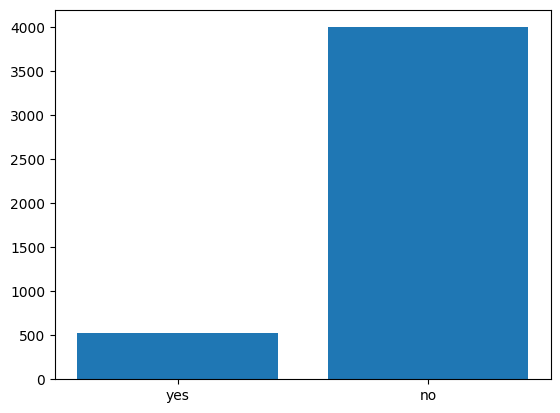

In [ ]:
y = bank_df['y']

# plot bar graph
plt.bar([1, 2], [len(y[y == 'yes']), len(y[y == 'no'])], tick_label=['yes', 'no'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
bank_df = pd.read_csv('/content/drive/MyDrive/DOCENCIA/PreGrado/MachineLearning/ML-UCSP/CONTENIDO 2025/Dataset/banking.csv', delimiter=',')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [15]:
# convert categorical data to int representations of unique categories
for col in bank_df.columns:
    labels, uniques = pd.factorize(bank_df[col])
    bank_df[col] = labels
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,1,1,1,1,1,0
2,2,2,1,2,1,0,0,0,2,0,...,1,1,1,1,2,2,2,2,2,1
3,3,3,0,3,1,1,0,0,3,1,...,2,0,0,0,3,3,3,3,3,0
4,4,4,0,0,1,0,0,0,0,1,...,0,2,2,1,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,31,4,0,3,0,1,1,1,2,0,...,0,0,0,0,0,9,9,38,0,0
41184,28,6,0,0,0,1,0,1,5,0,...,2,0,0,0,5,8,8,17,5,0
41185,23,5,1,2,0,0,1,1,5,4,...,1,0,0,0,5,8,8,25,5,0
41186,25,1,0,5,1,1,1,1,6,2,...,2,0,0,0,6,11,11,73,6,0


In [17]:
y = bank_df['y']
X = bank_df.drop(columns='y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9015247159366806
[[8864  269]
 [ 745  419]]


In [18]:
from sklearn.model_selection import cross_validate

# Define the range of n_estimators to evaluate
n_estimators_range = range(10, 201, 10)

train_errors = []
validation_errors = []

for n_estimators in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_validate(rfc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

    train_errors.append(1 - scores['train_score'].mean())
    validation_errors.append(1 - scores['test_score'].mean())


NameError: name 'plt' is not defined

In [19]:
import matplotlib.pyplot as plt


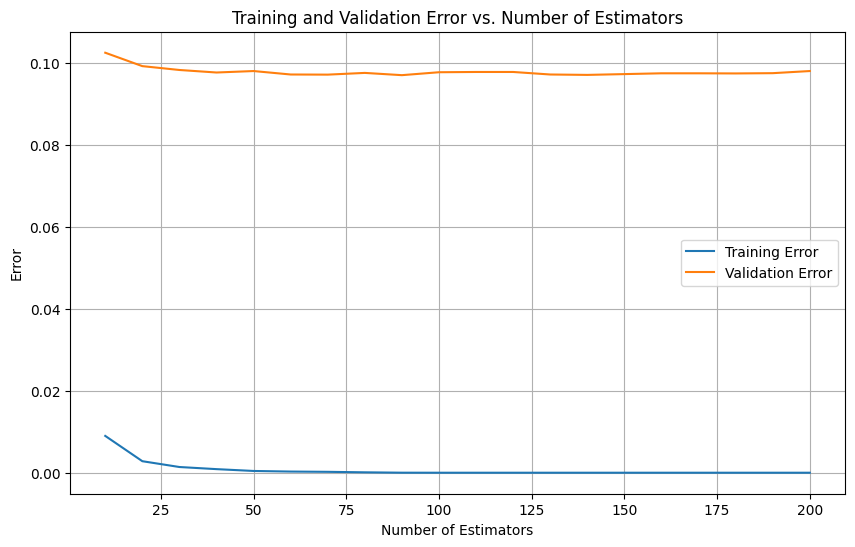

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Training Error')
plt.plot(n_estimators_range, validation_errors, label='Validation Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# <font color='blue'>2.3. Métodos de conjunto </font>

El término "sesgo" (bias) se refiere a cuánto se desvían en promedio las predicciones de un modelo con respecto a los valores reales. Refleja la habilidad del modelo para capturar la verdadera relación entre los predictores y la variable de respuesta. Por ejemplo, si la relación sigue un patrón no lineal, un modelo de regresión lineal, independientemente de cuántos datos se disponga, no podrá modelar adecuadamente la relación y tendrá un sesgo alto.

Por otro lado, el término "varianza" hace referencia a cuánto cambia el modelo en función de los datos utilizados en su entrenamiento. Idealmente, un modelo no debería cambiar demasiado ante pequeñas variaciones en los datos de entrenamiento. Si esto ocurre, indica que el modelo está memorizando los datos en lugar de aprender la verdadera relación entre los predictores y la variable de respuesta. Por ejemplo, un modelo de árbol con muchos nodos tiende a cambiar su estructura incluso con pequeñas variaciones en los datos de entrenamiento, lo que indica que tiene alta varianza.

Conforme aumenta la complejidad de un modelo, este dispone una mayor flexibilidad para adaptarse a las observaciones, lo que conlleva una reducción del sesgo y una mejora en su capacidad predictiva. Sin embargo, una vez alcanzado un cierto nivel de complejidad, surge el problema del sobreajuste (overfitting). Este fenómeno se presenta cuando el modelo se ajusta tanto a los datos de entrenamiento que es incapaz de predecir correctamente nuevas observaciones. El modelo óptimo es aquel que logra encontrar un equilibrio adecuado entre sesgo y varianza.

¿Cómo se controlan el bias y varianza en los modelos basados en árboles? Por lo general, los árboles pequeños, con pocas ramificaciones, tienden a tener poca varianza pero pueden no captar de manera precisa la relación entre las variables, lo que se traduce en un alto sesgo. Por otro lado, los árboles grandes se ajustan mucho a los datos de entrenamiento, lo que reduce el sesgo pero incrementa la varianza. Una forma de solucionar este problema son los métodos de ensemble.

Los métodos de ensemble combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. Dos de los tipos de ensemble más utilizados son:

**Bagging:** Se ajustan múltiples modelos, cada uno con un subconjunto distinto de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables categóricas). Los modelos Random Forest están dentro de esta categoría.

**Boosting:** Se ajustan secuencialmente múltiples modelos sencillos, llamados weak learners, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.

Aunque el objetivo final es el mismo, lograr un balance óptimo entre bias y varianza, existen dos diferencias importantes:

Forma en que consiguen reducir el error total. El error total de un modelo puede descomponerse como  bias+varianza+ϵ
 . En bagging, se emplean modelos con muy poco bias pero mucha varianza, agregándolos se consigue reducir la varianza sin apenas inflar el bias. En boosting, se emplean modelos con muy poca varianza pero mucho bias, ajustando secuencialmente los modelos se reduce el bias. Por lo tanto, cada una de las estrategias reduce una parte del error total.

Forma en que se introducen variaciones en los modelos que forman el ensemble. En bagging, cada modelo es distinto del resto porque cada uno se entrena con una muestra distinta obtenida mediante bootstrapping). En boosting, los modelos se ajustan secuencialmente y la importancia (peso) de las observaciones va cambiando en cada iteración, dando lugar a diferentes ajustes.

La clave para que los métodos de ensemble consigan mejores resultados que cualquiera de sus modelos individuales es que, los modelos que los forman, sean lo más diversos posibles (sus errores no estén correlacionados). Una analogía que refleja este concepto es la siguiente: supóngase un juego como el trivial en el que los equipos tienen que acertar preguntas sobre temáticas diversas. Un equipo formado por muchos jugadores, cada uno experto en un tema distinto, tendrá más posibilidades de ganar que un equipo formado por jugadores expertos en un único tema o por un único jugador que sepa un poco de todos los temas